<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# IntML2020 - Teoría Bayesiana - Distribuciones Normales Bivariadas

Puede ayudarse con la siguientes paginas 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, multivariate_normal 
from numpy.linalg import inv, det
from random import random

# Ejercicio 1
En muchos problemas de clasificacion de patrones se tiene la opcion de asignar un
 patron a una de $c$ clases, o de rechazarlo como irreconocible. Si el costo de
 hacer esto ultimo no es demasiado alto, puede ser una accion deseable. Sea

  $$\lambda(\alpha_i|\omega_j)=\left\{\begin{array}{ccc}
 0& \ &\mbox{ si }i=j, \ i,j=1,2,\ldots,c\\
 \lambda_r&&\mbox{ si }i=c+1\\
 \lambda_s&&\mbox{ en otro caso}\\
\end{array}\right.$$

 donde $\lambda_r$ es la pérdida sufrida por la eleccion de rechazarlo, y $\lambda_s$ es la
 pérdida incurrida por cometer un error. Mostrar que el riesgo mínimo se obtiene
 si decidimos $\omega_i$ si $P(\omega_i|x)\geq P (\omega_j|x)$ para todo $j$, y si $P(\omega_i|x)\geq 1-\frac{\lambda_r}{\lambda_s}$, caso contrario, rechazar. ¿Que sucede si $\lambda_r= 0$? ¿Que sucede si $\lambda_r>\lambda_s$?.
 


 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

Tenemos que el riesgo total se minimiza si minimizamos cada $R(\alpha_i|x)$. El valor de $R(\alpha_i | x)$ para $1 \le i \le c$ está dado por: 
$$R(\alpha_i | x) = \sum_{j=1}^c \lambda(\alpha_i | \omega_j) P(\omega_j|x) = \sum_{j=1, j\neq i}^c \lambda_s P(\omega_j|x) = \lambda_s (1-P(\omega_i | x)),$$
y $$R(\alpha_{c+1} | x) = \sum_{j=1} \lambda(\alpha_{c+1} | \omega_j) P(\omega_j|x) = \lambda_r \sum_{j=1}^c P(\omega_j|x) =  \lambda_r.$$
Para $i\le c$, el riesgo se minimiza si $P(\alpha_i|x)$ es máximo en el conjunto de los $P(\alpha_j|x)$, ya que $\lambda(\alpha_i|\omega_i) = 0$. Ahora, $R(\alpha_i |x)\le R(\alpha_{c+1}|x)$ si y sólo si 
$$\lambda_s (1-P(\alpha_i|x)) \le \lambda_r \qquad \mbox{si y sólo si} \qquad 1-P(\alpha_i|x) \le \frac{\lambda_r}{\lambda_s}\qquad \mbox {si y sólo si} \qquad P(\alpha_i|x) \ge 1-\frac{\lambda_r}{\lambda_s}$$

Si $\lambda_r = 0$, entonces por lo que acabamos de ver el riesgo total se minimiza si se rechaza en todos los casos.

Si $\lambda_r>\lambda_s$, entonces en ningún caso conviene rechazar puesto que $1-\frac{\lambda_r}{\lambda_s} < 0$.


# Ejercicio 2.
Considere el problema de clasificacion con la opcion de rechazo como irreconocible.

* (a)  Utilice los resultados del ejercicio anterior para demostrar que las siguientes funciones discriminantes son optimas para este tipo de problemas:

$$g_i(x)=\left\{\begin{array}{ccc}
 p(x|\omega_i)P(\omega_i)& \ &\mbox{ si }i=1,2,\ldots,c\\
 \displaystyle\frac{\lambda_s-\lambda_r}{\lambda_s}\displaystyle\sum_{j=1}^cp(x|\omega_j)P(\omega_j)&&\mbox{ si }i=c+1\\
\end{array}\right.$$

* (b) Grafique esta funcion discriminante y las regiones de decision para el caso del problema unidimensional con dos clases, teniendo

    * $x|\omega_1\sim \mathcal{N}(1, 1)$,
    *  $x|\omega_2\sim \mathcal{N}(-1,1)$,
    * $P(\omega_1) =P(\omega_2)=\displaystyle\frac12$, y
    * $\displaystyle\frac{\lambda_r}{\lambda_s}=\displaystyle\frac14$

* (c) Describa cualitativamente lo que sucede cuando $\displaystyle\frac{\lambda_r}{\lambda_s}$ se incrementa de $0$ a $1$.
* (d) Repita el procedimiento para el caso

    * $x|\omega_1\sim \mathcal{N}(1, 1)$,
    * $x|\omega_2\sim \mathcal{N}\left(0,\displaystyle\frac14\right)$,
    * $P(\omega_1)=\displaystyle\frac13$, $P(\omega_2)=\displaystyle\frac23$, y
    * $\displaystyle\frac{\lambda_r}{\lambda_s}=\displaystyle\frac12$



 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>



* (a) Según esta función discriminante, dada la característica $x$ se elige la clase $\omega_i$ si 

$$
p(x|\omega_i)P(\omega_i) \ge p(x|\omega_j)P(\omega_j)  \qquad (1)
$$ 

para $j\neq i$ y además no se la rechaza, es decir:

$$\lambda_s p(x|\omega_i)P(\omega_i) \ge (\lambda_s-\lambda_r)\displaystyle\sum_{j=1}^cp(x|\omega_j)P(\omega_j)\qquad (2).$$


Dividiendo por $p(x)$ (asumiendo que no es $0$, y si no también es cierto), tenemos que (1) equivale a 

$$P(\omega_i | x) \ge P(\omega_j|x), \qquad i \neq j, \qquad (3).$$


Simplificando en (2) en ambos miembros de la desigualdad el término 
$\lambda_s p(x|\omega_i)P(\omega_i)$ y observando que la sumatoria $\sum_{j=1}^c p(x|\omega_j)P(\omega_j) = p(x)$, tenemos que la función no rechaza la clase $\omega_i$ si 

$$\lambda_s \sum_{j\neq i} p(x|\omega_j)P(\omega_j) = \lambda_s (p(x)-p(x |\omega_i)P(\omega_i)) \ge \lambda_r p(x). \qquad (4)$$


Dividiendo por $p(x)$  y observando que $p(x |\omega_j)P(\omega_j) = P(\omega_j|x)p(x)$ concluimos de (3) y (4) que $g_i(x)$ clasifica en $\omega_i$ si


$$P(\omega_i|x) \ge P(\omega_j|x), \quad \mbox{para }{j \neq i} \quad \mbox{ y } \quad
P(\omega_i|x)) \le 1-\frac{\lambda_r}{\lambda_s}.$$


Luego esta función discriminante produce la elección de la clase $\omega_i$ que produce el riesgo mínimo, según lo probado en el Ejercicio 1.

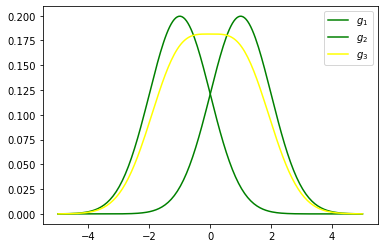

In [7]:
def normal(x,media,sigma):
    return np.exp(-(x-media)**2/(2*sigma**2))/(sigma*(2*np.pi)**(1/2))

x = np.linspace(-5,5,200)

lambda_rs = 1/4

g1 = normal(x,1,1)/2
g2 = normal(x,-1,1)/2
g3 = (1-lambda_rs)*(g1+g2)

plt.plot(x,g1,color='green',linestyle='solid',label=r'$g_1$')
plt.plot(x,g2,color='green',linestyle='solid',label=r'$g_2$')
plt.plot(x,g3,color='yellow',linestyle='solid',label=r'$g_3$')
#x_ = 
#plt.xvline()
#plt.grid(True, axis='x')
plt.legend()

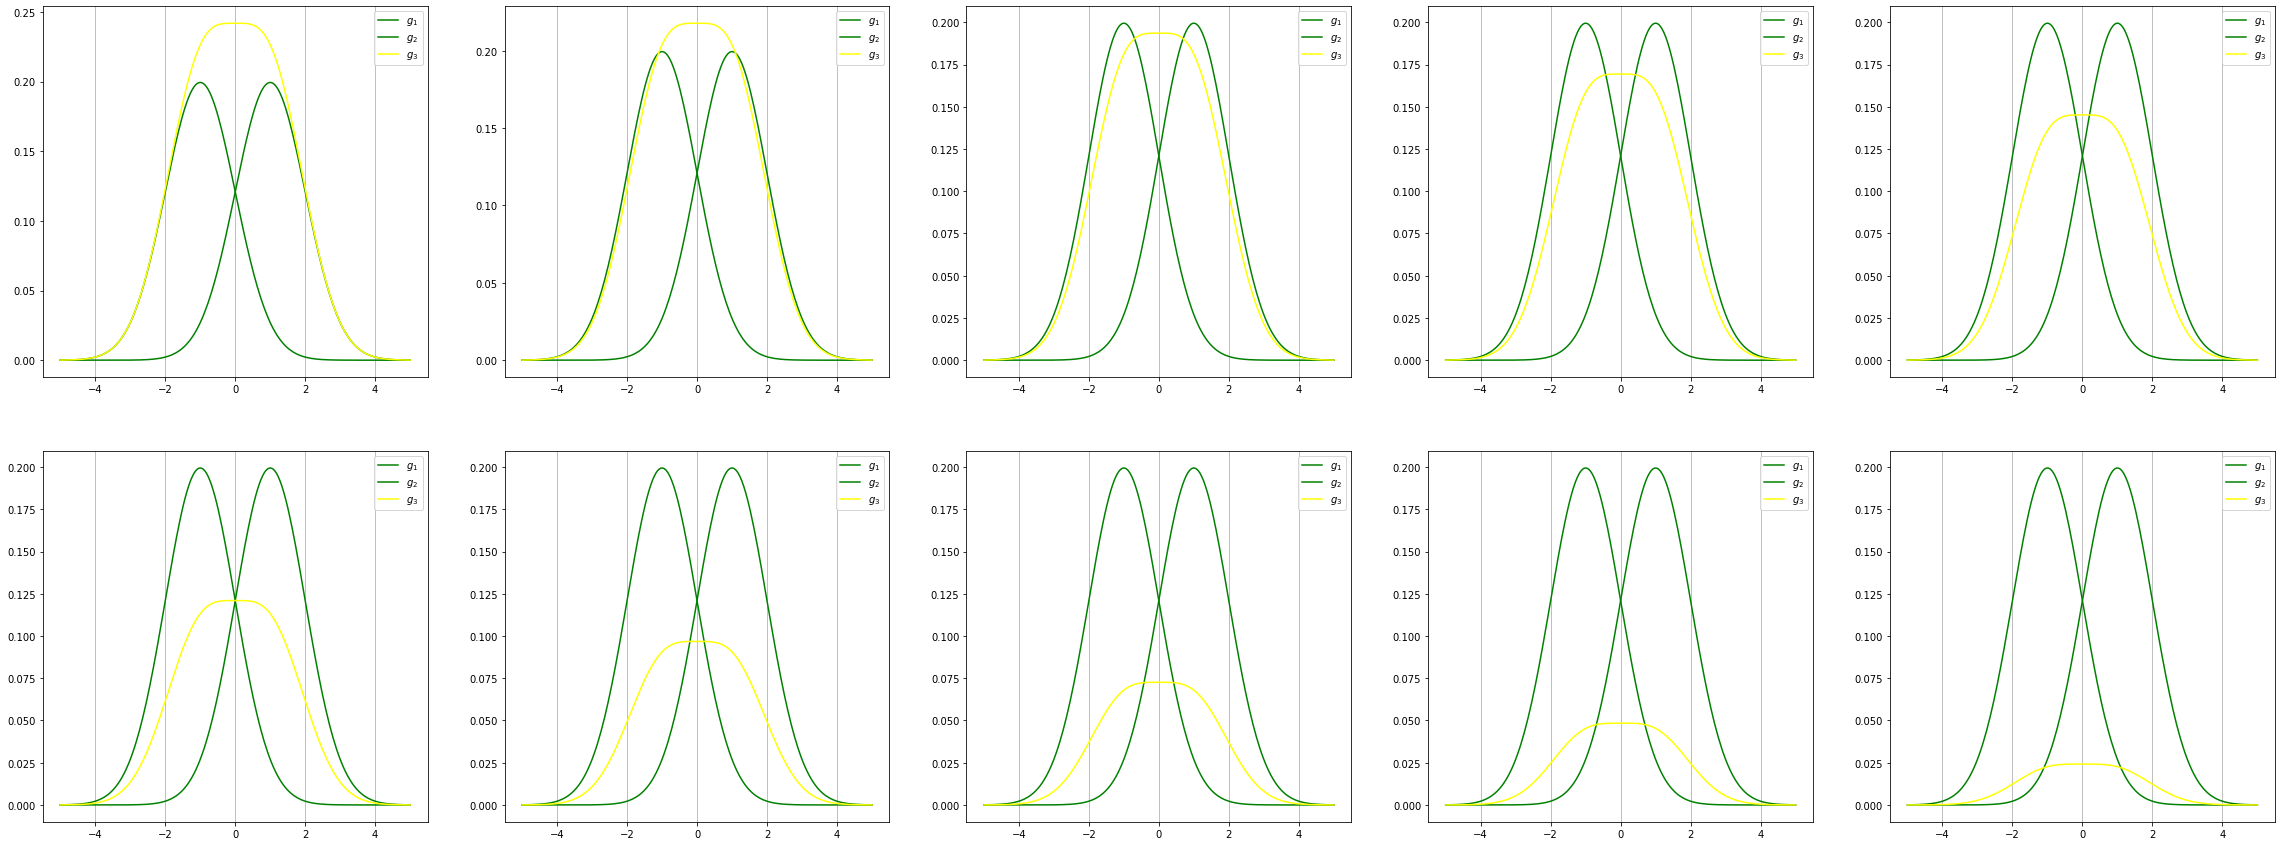

In [8]:
lambdas = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.subplots(2,5,figsize=(40,15))

for lambda_rs in lambdas:
    g3 = (1-lambda_rs)*(g1+g2)
    plt.subplot(2,5,lambdas.index(lambda_rs)+1)
    plt.plot(x,g1,color='green',linestyle='solid',label=r'$g_1$')
    plt.plot(x,g2,color='green',linestyle='solid',label=r'$g_2$')
    plt.plot(x,g3,color='yellow',linestyle='solid',label=r'$g_3$')
    plt.grid(True, axis='x')
    #plt.title(r'$\frac{\lambda_r}{\lambda_s}=$',lambda_rs)
    plt.legend()

Cuando $\frac{\lambda_r}{\lambda_s}$ se acerca a cero, el riesgo total se minimiza, pero cuando tiende a uno las probabilidades condicionales tienden a cero, y no hay ningun estado dado que ocurra una medicion x. 

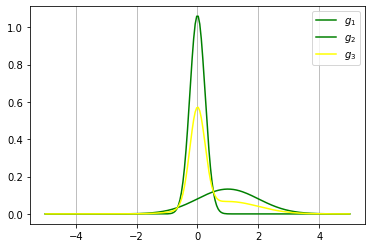

In [9]:
lambda_rs = 1/2

g1 = normal(x,1,1)/3
g2 = 2*normal(x,0,1/4)/3
g3 = (1-lambda_rs)*(g1+g2)

plt.plot(x,g1,color='green',linestyle='solid',label=r'$g_1$')
plt.plot(x,g2,color='green',linestyle='solid',label=r'$g_2$')
plt.plot(x,g3,color='yellow',linestyle='solid',label=r'$g_3$')
plt.grid(True, axis='x')
plt.legend()


# Ejercicio 3. 

Verifique que en el caso Normal bivariado , asumiendo clases equiprobables y la misma matriz de varianza covarianza, vale: 

* a) Si $\Sigma=\sigma^2 I$, maximizar $g_i({\bf x})$ implica minimizar la distancia euclidea entre ${\bf x}$ y ${\bf \mu_i}$,


* b) Si $\Sigma$ no diagonal, maximizar $g_i({\bf x})$ implica minimizar la distancia de Mahalanobis entre ${\bf x}$ y ${\bf \mu_i}$. 


* c) En una tarea de clasificacion de dos clases con dos caracteristicas, los vectores son generados por distribuciones normales que comparten la misma matriz de varianza covarianza ${\bf x}|\omega_1\sim \mathcal{N}(\mathbf{0},\left(\begin{array}{cc}
1.1&0.3\\
 0.3& 1.9\end{array}\right))$, ${\bf x} |\omega_2\sim \mathcal{N}\left(\left(\begin{array}{c}
 3\\ 3\end{array}\right),\left(\begin{array}{cc}
1.1&0.3\\
 0.3& 1.9\end{array}\right)\right)$. Clasifique el vector $(1,2.2)$ acorde con el clasificador Bayesiano. Coincide dicha clase con la clase cuya media es la más cercana (usando la distancia Euclidea)?


* d) Compute los ejes principales del elipse centrado en (0,0) que corresponde a la distanca de Mahalanobis $dm= \sqrt{ 2.952}$ del centro. 





 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>



a) Para el caso normal, se tiene que 
$$g_i(x) = \left( (2\pi)^k \det(\Sigma)\right)^{-1/2} \exp\left(-\frac 12(x-\mu)'\Sigma^{-1}(x-\mu)\right)\cdot P(\omega_i).$$
Tomando logaritmos resulta:
$$\log g_i(x) = -\frac k2 \log(2\pi) -\frac {\log(\det(\Sigma))}2 - \frac 12(x-\mu)'\Sigma^{-1}(x-\mu)+\log P(\omega_i).$$
Eliminando los términos que son iguales para todas las clases, sólo queda el término que incluye a la media $\mu$. Luego podemos tomar la función discriminante como:
$$g_i(x) = -(x-\mu)'\Sigma^{-1}(x-\mu) = \sigma^{-2}  (x-\mu)'(x-\mu).$$
Luego multiplicando por $\sigma^2$ y calculando la raíz cuadrada resulta $$g_i(x) = -||x-\mu||_2,$$ el opuesto de la distancia euclídea.
Así, como el clasificador clasifica en la clase $i$ si $g_i(x)$ es máximo, esto es equivalente a que la distancia euclídea sea mínima.


b) $(x-\mu)'\Sigma^{-1}(x-\mu)$ es la distancia de Mahalanobis al cuadrado. Vemos que si esta se minimiza, entonces 
$$g_i(x) = -(x-\mu)'\Sigma^{-1}(x-\mu)$$
se maximiza

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>
 
 Cuando se tienen dos características con la misma matriz de varianza covarianza, asumiendo que las probabilidades a priori $P(\omega_i)$ son las mismas para todas las clases, se tiene que la función discriminante estará dada por 
 $$
 g_i(x) = -(x-\mu)^T\Sigma^{-1}(x-\mu) 
 $$
 y maximizar esta función es equivalente a minimizar la distancia de Mahalanobis $(\vec{x}-\vec{\mu_i})^T \Sigma^{-1}(\vec{x}-\vec{\mu_i})$ del vector $\vec{x}$ a las medias $(0,0), (3,3)$. Nuestra matriz de varianza covarianza tiene una inversa dada por 
 $$
 \left(\begin{array}{cc}
0.95&-0.15\\
 -0.15& 0.55\end{array}\right)
 $$
 lo que implica que 
 $$ d_{mi}((1,2.2), (0,0))^2 = 2.952$$
 $$ d_{mi}((1,2.2), (3,3))^2 = 3.672$$
 
 lo que significa que este vector pertenece a la clase $\omega_1$ de acuerdo a este clasificador

<span style="color:red"> ESTUDIAR ESTA RESPUESTA Y COMPLETAR!!!</span>

d) La elipse con centro en $(0,0)$ y radio $r$ se corresponde a la ecuación 
$$\frac{x^2}{a^2} + \frac{y^2}{b^2} = r^2,$$
donde $a$ y $b$ son las semilongitudes de los ejes de la elipse. 

### Cálculo de la elipse

La distancia de Mahalanobis para una matriz $\Sigma^{-1} = \left(\begin{array}{cc}u & v \\ v & w \end{array}\right)$ al punto $(0,0)$ resulta:
$$d_M^2 ((x,y), (0,0)) = (x,y)' \Sigma^{-1} (x,y) = u x^2 + 2 v xy + wy^2. \qquad \qquad (1)$$

Queremos encontrar los ejes de la elipse dada por $d_M ((x,y), (0,0))= \sqrt{2.952}$.
Dado que si $v\neq 0$ es porque se trata de una elipse rotada, analizamos la elipse canónica:
$$\frac{\tilde x^2}{a^2} + \frac{\tilde y^2}{b^2} = r^2 = 2.952.$$
Escribimos 
$$\begin{cases}
\tilde x &= x \cos \theta - y \sin\theta \\
\tilde y &= x \sin \theta + y \cos\theta
\end{cases}
= Q \cdot \left(\begin{array}{c}x \\ y \end{array}\right), \qquad \mbox{es decir} \qquad \left(\begin{array}{c}x \\ y \end{array}\right) = Q^T \left(\begin{array}{c}\tilde x \\ \tilde y \end{array}\right)
$$
donde $Q$ es la matriz de rotación.
Reemplazando $\tilde x$ y $\tilde y$ en la ecuación de la elipse resulta:
\begin{eqnarray}
\frac 1{a^2} \tilde x^2 &=& \frac 1{a^2}\left(x^2 \cos^2 \theta -2xy \sin\theta\cos\theta + y^2 \sin^2 \theta\right)\\
\frac 1{b^2} \tilde y^2 &=& \frac 1{b^2}\left(x^2 \sin^2 \theta +2xy \sin\theta\cos\theta + y^2 \cos^2 \theta\right)\\
\mbox{sumamos} & &\\
r^2 &= &x^2(\frac 1{a^2} \cos^2 \theta + \frac 1b\sin^2 \theta) + 2xy(\frac 1{b^2}-\frac 1{a^2})\sin\theta\cos\theta + y^2(\frac 1{a^2}\sin^2\theta + \frac 1{b^2}\cos^2\theta)
\end{eqnarray}

De aquí resulta, volviendo a la fórmula (1):
$$
\begin{cases}
u &= \frac 1{a^2} \cos^2 \theta + \frac 1{b^2}\sin^2 \theta\\
w &= \frac 1{a^2}\sin^2\theta + \frac 1{b^2}\cos^2\theta\\
v &= (\frac 1{b^2}-\frac 1{a^2})\sin\theta\cos\theta
\end{cases}
$$

Operando con estas ecuaciones obtenemos:
$$u+ w = \frac{1}{a^2} + \frac{1}{b^2}, \qquad 
w-u = (\frac{1}{b^2}-\frac 1{a^2}) \cos2\theta, \qquad \qquad 2v = (\frac{1}{b^2}-\frac 1{a^2}) \sin 2\theta$$.

Así los ejes principales de la elipse están en la dirección rotada por el ángulo $\theta$ de $(1,0)$ y $(0,1)$ respectivamente.

Luego $\tan 2\theta = \frac {2v}{w-u}$, es decir $$\theta = \frac 12 \tan^{-1} \frac {2v}{w-u}.$$

### Especificamos en el ejemplo

$$\Sigma^{-1} = \left(\begin{array}{cc}0.95 & -0.15 \\ -0.15 & 0.55 \end{array}\right).$$
Así tenemos que 
$$\tan 2\theta = -\frac{0.3}{-0.4} = 0.75, $$

<span style="color:red">CODIFIQUE AQUÍ ESTOS VALORES </span>

Tenemos $$
\begin{cases}
\frac 1{a^2} + \frac 1{b^2} &= 0.95 + 0.55 = 1.5, \\
\frac{1}{b^2}- \frac 1{a^2}  &= \frac {-0.4}{0.949}
\end{cases}
$$

<span style="color:red">CODIFIQUE AQUÍ ESTOS VALORES</span>

Luego la elipse no rotada es:
$$\frac {\tilde x^2}{1^2} + \frac{\tilde y^2}{(\sqrt 2)^2} = 2.952 = r^2.$$
Las longitudes de los ejes son:
$$ a_1 = \sqrt{2.952}, \qquad b_1 = \sqrt{2 \cdot 2.952}$$

<span style="color:red">CODIFIQUE AQUÍ LA ELIPSE Y HAGA UNA FUNCIÓN PARA USAR EN OTRA OCASIÓN</span>

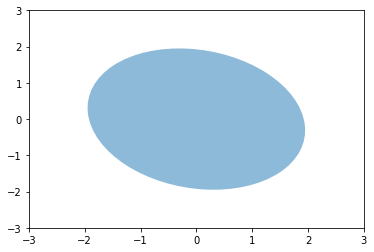

In [14]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, color=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    covariance = covariance[0:2,0:2]
    position = position[0:2]

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(2, 3):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs, color=color, alpha=0.5))
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)


X0=[0.,0.]    
SIGMA = np.array([[0.95,-0.15],[-0.15,0.95]])


draw_ellipse(X0, SIGMA)

# Ejercicio 4. 

* (a) Describa un procedimiento para generar muestras aleatorias de acuerdo a una distribucion normal
$\mathcal{N}_d(\mu,\Sigma)$, y un código Python (puede usar algun paquete). 


* (b) Describa un procedimiento que calcule la funcion discriminante para una distribucion normal dada y probabilidad a priori $P(\omega_i)$, y un código Python (puede usar algun paquete).


* (c) Describa un procedimiento que calcule la distancia euclidea entre dos puntos arbitrarios.


* (d)  Escriba un procedimiento que calcule la distancia de Mahalanobis entre la media $\mu$ y un punto arbitrario $x$, dada la matriz de covarianza $\Sigma$.

Puede usar 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py



# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

Supongamos que queremos generar muestras aleatorias que esten distribuidas de acuerdo a una funcion de densidad de probabilidad $p(x)$. Esto puede ser conseguido sistematicamente primero encontrando la distribucion de probabilidad acumulativa $P(x)$:
$$
P(x) =  \int_{-\infty}^{x} p(u)du
$$
y luego resolviendo la ecuación 
$$
P(x)=r
$$
para $x$ en función de $r$, donde $r$ es un número aleatorio en el rango $0\leq\:r\geq$. Los números aleatorios generados por ese método, denominado metodo de la trnasformada inversa, estan distribuidos de acuerdo a la función de densidad de probabilidad $p(x)$.

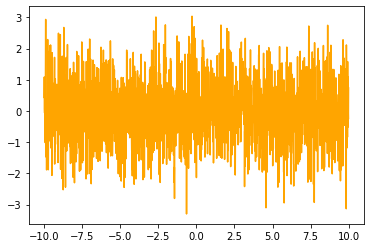

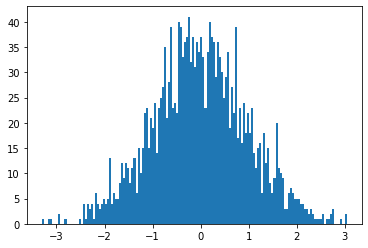

In [15]:
import random

mu = 0.
ssigma = 1.

xxxx = np.arange(-10,10,0.01)

lista = list(random.gauss(mu,ssigma) for i in range(2000))

plt.plot(xxxx, lista, 'orange')
plt.show()

campana=lista
plt.hist(campana, bins=150)
plt.show() 

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

El proceso de un análisis discriminante puede resumirse en 6 pasos:

Disponer de un conjunto de datos de entrenamiento (training data) en el que se conoce a que grupo pertenece cada observación.
Calcular las probabilidades previas (prior probabilities): la proporción esperada de observaciones que pertenecen a cada grupo.
Determinar si la varianza o matriz de covarianzas es homogénea en todos los grupos. De esto dependerá que se emplee LDA o QDA.
Estimar los parámetros necesarios para las funciones de probabilidad condicional, verificando que se cumplen las condiciones para hacerlo.
Calcular el resultado de la función discriminante. El resultado de esta determina a qué grupo se asigna cada observación.
Utilizar validación cruzada (cross-validation) para estimar las probabilidades de clasificaciones erróneas.

/tmp/ipykernel_9201/938833455.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(muu1, sigma1, 5000).T


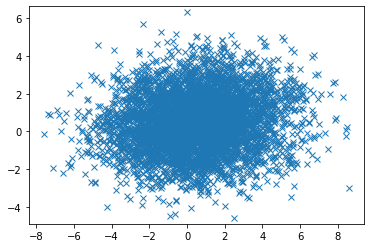

In [19]:
import numpy as np
import pylab as pl
from sklearn import mixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

muu1 = np.array([0.5, 0.5])
muu2 = np.array([1.0, 1.0])
sigma1 = np.array([[0.4, 2.3], [5.3, 0.3]])

import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(muu1, sigma1, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

/tmp/ipykernel_9201/3950139330.py:8: RuntimeWarning: invalid value encountered in log
  g1 = -0.5*np.sum(np.dot(v, inv_sigma1)*v, axis=1)-0.5*np.log(2.*np.pi)-0.5*np.log(np.linalg.det(inv_sigma1))+np.log(P1)


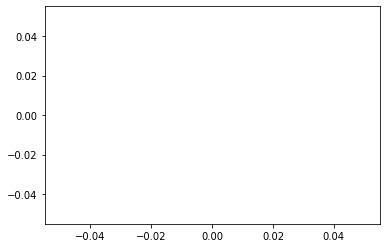

In [20]:
P2 = 1/2
P1 = 1/2

def g1(x, y):
    inv_sigma1 = np.linalg.inv(sigma1)
    points = np.c_[x, y]
    v = points - muu1
    g1 = -0.5*np.sum(np.dot(v, inv_sigma1)*v, axis=1)-0.5*np.log(2.*np.pi)-0.5*np.log(np.linalg.det(inv_sigma1))+np.log(P1)
    return g1

def g2(x, y):
    invC = np.linalg.inv(C1)
    points = np.c_[X.ravel(), Y.ravel()]
    v = points - M2
    g2 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - 0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C1))+np.log(P2)
    return g2

xxxx = np.arange(-25,25,0.01)

plt.plot(xxxx, g1(x,y), 'g')
plt.show()

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>


Para calcular la distancia euclidea entre dos puntos arbitrarios, se debe transponer la resta de ambos vectores y multiplicar matricialmente por la resta de ambos. 

In [21]:
def euclidea(a,b):
    a_vec = np.array(a)
    b_vec = np.array(b)
    a_b = a_vec - b_vec
    return np.matmul(a_b.T,a_b)

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

In [25]:
def mahalanobis(x,mu,sigma):
    x_mu = x - mu
    inv_covmat = np.linalg.inv(sigma)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return np.sqrt(mahal)

# Ejercicio 5. 



* (a)  Utilice el codigo del problema anterior para simular dos normales $(X_1,X_2)$ con $\Sigma= C^T.C$, y $C= \left(\begin{array}{cc}
0&-0.23\\
 0.83& .23\end{array}\right)$ y vectores de media $\mu_1 =(0,0)$ y $\mu_2=(1,1)$ respectivamente. 
 
 
* (b) Supongamos que las probabilidades a priori de las dos primeras categorias son iguales ($P(\omega_1)=P(\omega_2)=\displaystyle\frac12$, diseñe y codifique  un clasificador para  dos categorias normales utilizando solo el valor de caracteristica $X_1$ especificada en el inciso anteiror. El código resultante debe poder clasificar una nueva muestra basado en esta información. 

Recuerde que para el diseño del clasificador se estimará la media y varianza a partir de los datos de cada una de las muestras. Si para la muestra $i$ la media y varianza son $\mu_i$ y $\sigma_i^2$ respectivamente, se clasificará un valor $x$ en la muestra $1$ si 
$$\frac 1{\sqrt{2\pi\sigma_1^2}} e^{-(x-\mu_1)^2/2\sigma_1^2}P(\omega_1) > \frac 1{\sqrt{2\pi\sigma_2^2}} e^{-(x-\mu_2)^2/2\sigma_2^2}P(\omega_1).$$
Tomando logaritmos, y eliminando las probabilidades a priori $P(\omega_i)$ por ser iguales esto es equivalente a decidir por la clase 1 si 
$$-\frac 12 \ln(2\pi) - \ln \sigma_1 - \frac{(x-\mu_1)^2}{2\sigma_1^2} > 
-\frac 12 \ln(2\pi) - \ln \sigma_2 - \frac{(x-\mu_2)^2}{2\sigma_2^2}$$
es decir, si 
$$ \ln \sigma_1 + \frac{(x-\mu_1)^2}{2\sigma_1^2} <  \ln \sigma_2 + \frac{(x-\mu_2)^2}{2\sigma_2^2}.$$



* (c) Determinar el error de entrenamiento empirico en sus muestras, es decir, el porcentaje de puntos mal clasificados, dividiendo el conjunto de $n=100$ muestras aleatoriamente en 80\% entrenamiento 20\% test. Repita incrementando los valores de $n$, $100\leq n\leq 10000$ en pasos de 100 y grafique el error empirico obtenido.


* (d) Utilice la cota de Bhattacharyya para acotar el error que obtendran los  patrones nuevos obtenidos muestreando las distribuciones.


* (e) Repita todo lo anterior, pero ahora utilice dos caracteristicas, $X_1$ y $X_2$.


* (f) Analice sus resultados. En particular, ¿es siempre posible para un conjunto finito de datos que  el error empirico pueda ser mayor al aumentar la dimension de los datos?.

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

In [ ]:
import random

mu = 0.
ssigma = 1.

xxxx = np.arange(-10,10,0.01)

lista = list(random.gauss(mu,ssigma) for i in range(2000))

plt.plot(xxxx, lista, 'orange')
plt.show()

campana=lista
plt.hist(campana, bins=150)
plt.show() 

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO F AQUÍ </span>

# Ejercicio 6. 

Considere el problema de clasificacion bidimensional en cuatro categorias con 
$x|\omega_1\sim \mathcal{N}(\mathbf{0},\mathbf{I})$, $x |\omega_2\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 1\end{array}\right),\mathbf{I}\right)$, $x |\omega_3\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 -3\end{array}\right),\left(\begin{array}{cc}
 2&0.5\\
 0.5&2\end{array}\right)\right)$ y $x |\omega_4\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 2\end{array}\right),\left(\begin{array}{cc}
 5&4\\
 4&5\end{array}\right)\right)$ y $P (\omega_i)=\displaystyle\frac14$ para todo i.
 
 * (a) ¿Cual es la distancia de Mahalanobis entre cada uno de los puntos $(1, 2)^T, (5, 3)^T, (0, 0)^T,
 (1, 0)^T$ y las medias de cada una de las clases.
 

* (b) Clasificar estos puntos.

* (c) Suponga que $P(\omega_1)=0.7$ y $P(\omega_2)=P(\omega_3)=P(\omega_4)=0.1$, y clasifique nuevamente los puntos.


Recuerde que como las clases son equiprobables, para clasificar los puntos se busca el máximo de los $g_i(x)$, con 
$$g_i(x) = -\ln(\det(\Sigma_i)) -  (x-\mu_i)'\Sigma_i^{-1}(x-\mu_i).$$


# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

In [26]:
mean1 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 1]])
mean2 = np.array([1, 1])
cov2 = np.array([[1, 0], [0, 1]])
mean3 = np.array([1, -3])
cov3 = np.array([[2, 0.5], [0.5, 2]])
mean4 = np.array([1, 2])
cov4 = np.array([[5, 4], [4, 5]])

x1=np.array([1, 2])
x2=np.array([5, 3])
x3=np.array([0, 0])
x4=np.array([1, 0])

In [27]:
mahal11 = mahalanobis(x1, mean1, cov1)
mahal12 = mahalanobis(x1, mean2, cov2)
mahal13 = mahalanobis(x1, mean3, cov3)
mahal14 = mahalanobis(x1, mean4, cov4)

mahal21 = mahalanobis(x2, mean1, cov1)
mahal22 = mahalanobis(x2, mean2, cov2)
mahal23 = mahalanobis(x2, mean3, cov3)
mahal24 = mahalanobis(x2, mean4, cov4)

mahal31 = mahalanobis(x3, mean1, cov1)
mahal32 = mahalanobis(x3, mean2, cov2)
mahal33 = mahalanobis(x3, mean3, cov3)
mahal34 = mahalanobis(x3, mean4, cov4)

mahal41 = mahalanobis(x4, mean1, cov1)
mahal42 = mahalanobis(x4, mean2, cov2)
mahal43 = mahalanobis(x4, mean3, cov3)
mahal44 = mahalanobis(x4, mean4, cov4)

mahal1= np.array([mahal11, mahal12,mahal13, mahal14])
mahal2= np.array([mahal21, mahal22,mahal23, mahal24])
mahal3= np.array([mahal31, mahal32,mahal33, mahal34])
mahal4= np.array([mahal41, mahal42,mahal43, mahal44])


print("La distancia de mahalanobis para el punto 1 es:")
print(mahal1)
print("La distancia de mahalanobis para el punto 2 es:")
print(mahal2)
print("La distancia de mahalanobis para el punto 3 son:")
print(mahal3)
print("La distancia de mahalanobis para el punto 4 son:")
print(mahal4)

La distancia de mahalanobis para el punto 1 es:
[2.23606798 1.         3.65148372 0.        ]
La distancia de mahalanobis para el punto 2 es:
[5.83095189 4.47213595 4.61880215 2.4267033 ]
La distancia de mahalanobis para el punto 3 son:
[0.         1.41421356 2.47655675 1.        ]
La distancia de mahalanobis para el punto 4 son:
[1.         1.         2.19089023 1.49071198]


 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>  

In [28]:
g1= np.zeros(mahal1.shape)
g2= np.zeros(mahal2.shape)
g3= np.zeros(mahal3.shape)
g4= np.zeros(mahal4.shape)

#los nros de g marcan para que punto es, no la categoría, eso está marcado por la indexación en el vector
g1= np.array([-np.log(np.linalg.det(cov1))-mahal11, -np.log(np.linalg.det(cov2))-mahal12, -np.log(np.linalg.det(cov3))-mahal13, -np.log(np.linalg.det(cov4))-mahal14]) 
g2= np.array([-np.log(np.linalg.det(cov2))-mahal21, -np.log(np.linalg.det(cov2))-mahal22, -np.log(np.linalg.det(cov3))-mahal23, -np.log(np.linalg.det(cov4))-mahal24]) 
g3= np.array([-np.log(np.linalg.det(cov1))-mahal31, -np.log(np.linalg.det(cov2))-mahal32, -np.log(np.linalg.det(cov3))-mahal33, -np.log(np.linalg.det(cov4))-mahal34]) 
g4= np.array([-np.log(np.linalg.det(cov1))-mahal41, -np.log(np.linalg.det(cov2))-mahal42, -np.log(np.linalg.det(cov3))-mahal43, -np.log(np.linalg.det(cov4))-mahal44]) 

print("Clasifico de acuerdo a la mayor g (me ayuda que la probabilidad de cada distribución sea la misma)")
print(max(g1), "Punto 1 corresponde a Categoría ", np.argmax(g1)+1)
print(max(g2), "Punto 2 corresponde a Categoría ",np.argmax(g2)+1)
print(max(g3), "Punto 3 corresponde a Categoría ", np.argmax(g3)+1)
print(max(g4), "Punto 4 corresponde a Categoría ", np.argmax(g4)+1)

Clasifico de acuerdo a la mayor g (me ayuda que la probabilidad de cada distribución sea la misma)
-1.0 Punto 1 corresponde a Categoría  2
-4.47213595499958 Punto 2 corresponde a Categoría  2
-0.0 Punto 3 corresponde a Categoría  1
-1.0 Punto 4 corresponde a Categoría  1


 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>  
Para esta situación se tienen en cuenta además los pesos de cada clase. Luego se clasifica en la clase $i$ que maximiza $g_i$, con:
$$g_i(x) = -\frac 12 \ln(\Sigma_i) -\frac 12 dM(x,\mu_i) + \ln P(\omega_i).$$


In [29]:
p1=0.7
p2=0.1
p3=0.1
p4=0.1

f1= np.array([-0.5*np.log(np.linalg.det(cov1))-0.5*mahal11 + np.log(p1), -0.5*np.log(np.linalg.det(cov2))-0.5*mahal12 + np.log(p2), -0.5*np.log(np.linalg.det(cov3))-0.5*mahal13 + np.log(p3), -0.5*np.log(np.linalg.det(cov4))-0.5*mahal14 + np.log(p4)]) 
f2= np.array([-0.5*np.log(np.linalg.det(cov1))-0.5*mahal21 + np.log(p1), -0.5*np.log(np.linalg.det(cov2))-0.5*mahal22 + np.log(p2), -0.5*np.log(np.linalg.det(cov3))-0.5*mahal23 + np.log(p3), -0.5*np.log(np.linalg.det(cov4))-0.5*mahal24 + np.log(p4)]) 
f3= np.array([-0.5*np.log(np.linalg.det(cov1))-0.5*mahal31 + np.log(p1), -0.5*np.log(np.linalg.det(cov2))-0.5*mahal32 + np.log(p2), -0.5*np.log(np.linalg.det(cov3))-0.5*mahal33 + np.log(p3), -0.5*np.log(np.linalg.det(cov4))-0.5*mahal34 + np.log(p4)]) 
f4= np.array([-0.5*np.log(np.linalg.det(cov1))-0.5*mahal41 + np.log(p1), -0.5*np.log(np.linalg.det(cov2))-0.5*mahal42 + np.log(p2), -0.5*np.log(np.linalg.det(cov3))-0.5*mahal43 + np.log(p3), -0.5*np.log(np.linalg.det(cov4))-0.5*mahal44 + np.log(p4)]) 

print("Clasifico de acuerdo a la mayor f (casos probabilidades distintas)")
print(max(f1), "Punto 1 corresponde a Categoría ", np.argmax(f1)+1)
print(max(f2), "Punto 2 corresponde a Categoría ",np.argmax(f2)+1)
print(max(f3), "Punto 3 corresponde a Categoría ", np.argmax(f3)+1)
print(max(f4), "Punto 4 corresponde a Categoría ", np.argmax(f4)+1)

Clasifico de acuerdo a la mayor f (casos probabilidades distintas)
-1.4747089326886273 Punto 1 corresponde a Categoría  1
-3.272150891361383 Punto 2 corresponde a Categoría  1
-0.35667494393873245 Punto 3 corresponde a Categoría  1
-0.8566749439387324 Punto 4 corresponde a Categoría  1


# Ejercicio 7. 
Suponiendo que $\lambda_{21}>\lambda_{11}$ y $\lambda_{12}>\lambda_{22}$, 

* a) mostrar que la funcion discriminante de riesgo minimo general para el caso binario independiente  esta
dado por $$g(x)=w^Tx+\omega_0$$, donde $w$ es constante, y
$$\omega_0=\displaystyle\sum_{i=1}^d\ln\displaystyle\frac{1-p_i}{1-q_i}+\ln\displaystyle\frac{P(\omega_1)}{P(\omega_2)}+\ln\displaystyle\frac{\lambda_{21}-\lambda_{11}}{\lambda_{12}-\lambda_{22}}$$

* b) Codifique esta función discriminante, diga qué valores debe tener de entrada para clasificar un nuevo dato. 

* c) Simule una muestra aleatoria de tamaño 100 de distribución binaria con probabilidades $p_i=0.3$ y $q_i=0.8$, y considere igual probabilidades a priori y pérdida cero uno. Clasifique esa muestra con la función anterior.

 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


 
 Tenemos que la función discriminante para cada clase está dada por:
$$g_1(x) = - R(\alpha_1|x) = -(\lambda_{11}P(\omega_1|x) + \lambda_{12}P(\omega_2|x))$$
$$g_2(x) = - R(\alpha_2|x) = -(\lambda_{21}P(\omega_1|x) + \lambda_{22}P(\omega_2|x))$$


Dado que son dos clases, se puede considerar el discriminante $g(x) = g_1(x)-g_2(x)$ y clasificar en la clase $1$ si $g(x)>0$. Observamos entonces que:

$$
\begin{eqnarray}
g(x) &=& P(\omega_1|x)\cdot(\lambda_{21}-\lambda_{11}) + P(\omega_2|x)\cdot(\lambda_{22}-\lambda_{12}) \\
     &=& \frac{p(x | \omega_1) P(\omega_1)}{p(x)} \cdot(\lambda_{21}-\lambda_{11}) + \frac{p(x | \omega_2)P(\omega_2)}{p(x)}\cdot(\lambda_{22}-\lambda_{12}) \\
     &=& \frac{p(x | \omega_1) P(\omega_1)}{p(x)} \cdot(\lambda_{21}-\lambda_{11}) - \frac{p(x | \omega_2)P(\omega_2)}{p(x)}\cdot(\lambda_{12}-\lambda_{22}) 
\end{eqnarray}
$$ 

Así se clasifica en la clase 1 si $g(x)>0$, o lo que es lo mismo, si 
$$\frac{p(x | \omega_1) P(\omega_1)\cdot(\lambda_{21}-\lambda_{11}) } {p(x | \omega_2)P(\omega_2)\cdot(\lambda_{12}-\lambda_{22}) } > 1 \qquad (*)$$

Tomando logaritmos, $(*)$ es equivalente a:
$$\ln\frac{p(x | \omega_1) }{p(x|\omega_2} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}> 0. \qquad (**)$$

### <font color = green> Caso de variables binarias independientes </font>

Si se trata de variables binarias, independientes, entonces tenemos
$$x = (x_1,x_2,\dots, x_d),\qquad x_i = 0, 1,$$
y 
$$p(x_i=1 | \omega_j) = \begin{cases} p_i & \omega_j = \omega_1 \\ q_i & \omega_j = \omega_2
\end{cases}$$

Podemos escribir también:
$$p(x_i | \omega_j) = \begin{cases} p_i^{x_i}(1-p_i)^{1-x_i} & \omega_j = \omega_1 \\
q_i^{x_i}(1-q_i)^{1-x_i} & \omega_j = \omega_2
\end{cases}
$$
Como son independientes, entonces $p((x_1x_2\dots x_d)|\omega_j) = p(x_1|\omega_j)p(x_2|\omega_j)\dots p(x_d|\omega_j)$, para $j=1,2$.

Ahora en la fórmula de $g(x)$ podemos eliminar el factor común $p(x)$ y tomar logaritmos. Así resulta que $(**)$ es equivalente a:

$$ \sum_{i=1}^d x_i \ln\frac{p_i}{q_i} + \sum_{i=1}^d (1-x_i) \ln\frac{1-p_i}{1-q_i} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}> 0.$$
Agrupando los $x_i$ resulta:
$$\underbrace{\sum_i  \left(\ln\frac{p_i}{q_i}-\ln\frac{1-p_i}{1-q_i}\right)\cdot x_i }_{w^T\cdot x}+ \underbrace{\sum_{i=1}^d \ln\frac{1-p_i}{1-q_i} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}}_{w_0}> 0.$$

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>  

In [30]:
def g(x,P_1,p1,s):
    
    P_2 = 1 - P_1
    
    ln = np.log(P_1/P_2) + np.log((s[1,0] - s[0,0]) / (s[0,1] - s[1,1]))
    
    w_0 = 0
    w_1 = 0
    
    for i in range(0, 99):
        w_0 = w_0 + np.log((1-p1[i])/p1[i])
    
    w_0 = w_0 + ln
    
    for i in range(0,99):
        w_1 = w_1 + ( np.log(p1[i]/(1-p1[i])) - np.log((1-p1[i])/(p1[i])) )* x[i]
    
    g = w_0 + w_1
    
    return g

In [31]:
rng = np.random.default_rng()
n, p = 1, .7  # number of trials, probability of each trial
x = rng.binomial(n, p, n)

In [32]:
## Muestra aleatoria binaria (0 y 1) con n=100 y:
## Iguales probabilidades a priori ==> P_1=P_2=0.5 , funcion perdida 1-0; p_i = 0.3 / q_i = 0.7
def g(x,P_1,p1,s):
    ''' Funcion discriminante. P_1 es la probabilidad a priori de w1, p1 son las probabilidades de p_i (vector) 
    y s es la matriz perdida'''
    
    P_2 = 1 - P_1
    
    ln = np.log(P_1/P_2) + np.log((s[1,0] - s[0,0]) / (s[0,1] - s[1,1]))
 
    w_0 = 0
    w_1 = 0
    
    for i in range(0, m):
        w_0 = w_0 + np.log((1-p1[i])/p1[i])
    
    w_0 = w_0 + ln
    
    for i in range(0,m):
        w_1 = w_1 + ( np.log(p1[i]/(1-p1[i])) - np.log((1-p1[i])/(p1[i])) )* x[i]
    
    g = w_0 + w_1
    
    return g

m = 99
rng = np.random.default_rng()
n, p = 1, .3 # number of trials, probability of each trial
x = rng.binomial(n, p, m)

P_1 = 0.5

p1 = np.zeros(m)
p1[:] = 0.3

s = np.array([[0.0,1.0],[1.0,0.0]])
    
g = g(x,P_1,p1,s)

print (x)
print("Con un valor de g=",g)
if g > 0: 
    print('=> x pertenece a w1') 
else:
    print('=> x pertenece a w2')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
Con un valor de g= 43.21219087974721
=> x pertenece a w1


 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>  

# Ejercicio 8. 

La distribucion de Poisson para una variable discreta $x = 0, 1, 2,\ldots$ y parametro real $\lambda$ es
$$P(x|\lambda)=e^{-\lambda}\displaystyle\frac{\lambda^x}{x\!}$$

Considere el problema de clasificacion en dos categorias igualmente probables con distribuciones de Poisson, pero con diferentes parametros $\lambda_1>\lambda_2$.

 * (a) ¿Cual es la regla de clasificacion de Bayes?
 
 * (b) ¿Cual es la tasa del error de Bayes?
 
* (c) Codifique esta función discriminante, diga qué valores debe tener de entrada para clasificar un nuevo dato. 

* (d) Simule una muestra aleatoria de tamaño 100 de distribución de Poisson con $\lambda_1=1.8$, $\lambda_2=0.4$, y considere igual probabilidades a priori y pérdida cero uno. Clasifique esa muestra con la función anterior. Estime el Error cometido, y compárelo con el error de Bayes calculado. 



# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>  

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>  

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>  

<br>
<br>